Mounting this colaboratory to the drive.

In [49]:
from google.colab import drive
drive.mount("/content/gdrive")
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from google.colab.patches import *
import glob
from matplotlib import pyplot
from skimage.measure import compare_ssim
import pandas as pd
import os
import tensorflow as tf 
from skimage import io
from PIL import Image
import requests
from io import BytesIO
from google.colab.patches import cv2_imshow

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# prior functional work


Finding contours in the image


(1204, 1880)


error: ignored

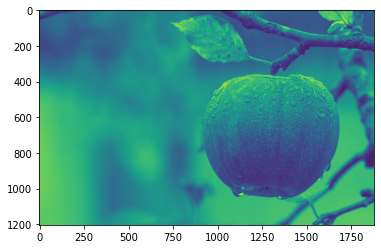

In [52]:
img = io.imread("")
print(img.shape)
copy = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, 0)
blurred = cv2.GaussianBlur(thresh, (5, 5), 0)
edged = cv2.Canny(blurred, 30, 150) 
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="top-to-bottom")[0]
cnt_image = cv2.drawContours(image, cnts, -1, 255, 7)
cv2_imshow(cnt_image)

The code snippet below intends to find the area of contours for each of the boxes. However, this code is not working properly and sime other logic has to be made. 
Ignore running the code. 

In [25]:
temp = cv2.imread("/content/gdrive/My Drive/digit/0-5/25.jpg")
print(temp.shape)
cropped = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(cropped, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
th3 = cv2.subtract(255, th3)
pred_temp = th3
pred_temp = cv2.resize(pred_temp, (28, 28))
pred_temp = pred_temp / 255.0

(143, 107, 3)


Drawing bounding boxes around each answer. 

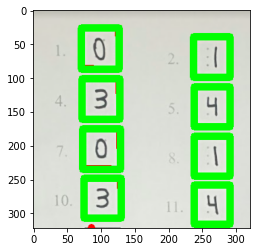

In [26]:
for c in cnts:
  if cv2.contourArea(c) >= 1000:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(cnt_image, (x, y), (x + w, y + h), (0, 255, 0), 10)
plt.imshow(cnt_image)

Loading model

In [20]:
model = load_model('/content/gdrive/My Drive/digit/0_5model.h5')

Answer_1.png


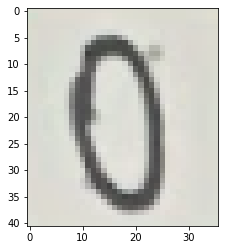

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


SSIM: 0.19574445333807164
[9.9989736e-01 1.3564038e-07 1.3788339e-07 3.2406355e-09 1.0232764e-04
 4.3008015e-08]


Predicted Value : 0
Answer_2.png


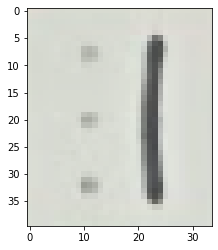

SSIM: 0.21556082329931775
[3.0770138e-07 9.9826282e-01 3.9076125e-09 2.7354519e-08 1.7367699e-03
 4.3150511e-08]


Predicted Value : 1
Answer_3.png


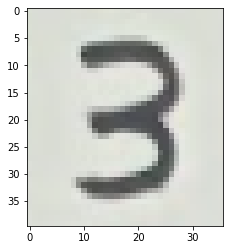

SSIM: 0.21974814851670244
[3.0223184e-08 8.5683816e-09 9.4633415e-06 9.9998927e-01 4.6052233e-07
 8.1118708e-07]


Predicted Value : 3
Answer_4.png


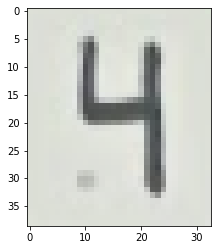

SSIM: 0.18693834472904444
[1.5189806e-11 3.7794489e-08 4.8569752e-11 1.0351487e-09 1.0000000e+00
 2.2782756e-09]


Predicted Value : 4
Answer_5.png


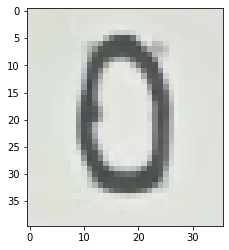

SSIM: 0.24060562158408336
[9.9998343e-01 5.9421523e-10 1.6120759e-05 5.4692335e-09 4.4766608e-07
 5.5318039e-09]


Predicted Value : 0
Answer_6.png


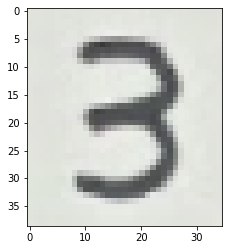

SSIM: 0.16484269512359165
[1.21064865e-08 1.59512368e-08 1.24672433e-05 9.99986768e-01
 3.31042685e-07 4.28406395e-07]


Predicted Value : 3
[0, 1, 3, 4, 0, 3]


In [27]:
ROI_number = 1
Pred_answers = []
for c in cnts:
  if cv2.contourArea(c) >= 3000:
    x,y,w,h = cv2.boundingRect(c)
    ROI = copy[y+10:y+h-10, x+10:x+w-10]
    print('Answer_{}.png'.format(ROI_number))
    plt.figure()
    plt.imshow(ROI)
    plt.show()
    plt.close()
    #cv2.imwrite("/content/gdrive/My Drive/digit/0-5/{}.jpg".format(ROI_number),ROI)
    # array slices in startY:endY, startX:endX order -- here we are
    #cropped = ROI[15:180, 20:180]
    cropped = cv2.cvtColor(ROI, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(cropped, (5, 5), 0)
    ret3, th3 = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    th3 = cv2.subtract(255, th3)
    pred_img = th3
    pred_img = cv2.resize(pred_img, (28, 28))
    pred_img = pred_img / 255.0
    (score, diff) = compare_ssim(pred_temp, pred_img, full=True)
    print("SSIM: {}".format(score))

    if score < 0.6:
      pred_img = pred_img.reshape(1,784)
      all_classes = model.predict(pred_img)[0]
      prediction = np.argmax(model.predict(pred_img)[0])
      print(model.predict(pred_img)[0])
      if all_classes[prediction] > 0.7:
        print("\n\nPredicted Value : {}".format(prediction))
        Pred_answers.append(prediction)
      else:    
       print("doubtful")
       Pred_answers.append("Doubtful")
    else:
      print("Unattempted")
      Pred_answers.append("Unattempted")
      
    
    ROI_number+=1
print(Pred_answers)

## Working on generating final result

Finalizing our list before comparing answers

In [ ]:
for i in range(len(Pred_answers)):
  if Pred_answers[i] == "Unattempted":
    Pred_answers[i] = 0
  if Pred_answers[i] == "Doubtful":
    Pred_answers[i] = int(input("Answer {} is doubtful. Please enter it here: ".format(i+1)))
print(Pred_answers)

Answer 2 is doubtful. Please enter it here: 1
Answer 8 is doubtful. Please enter it here: 1
Answer 14 is doubtful. Please enter it here: 1
[0, '1', 2, 3, 4, 5, 0, '1', 2, 3, 4, 5, 0, '1', 2, 3, 4, 5, 0, 4, 2, 3, 4, 5, 0, 4, 0, 2, 3, 4]


In [ ]:
answers = pd.read_excel (r'/content/gdrive/My Drive/digit/Ineye-Answers.xlsx')

In [ ]:
dfA = answers[answers["Code"] == "A"]["Answer"].values.tolist()
dfB = answers[answers["Code"] == "B"]["Answer"].values.tolist()
print(dfA)
print(dfB)

[2, 4, 3, 2, 4, 3, 4, 5, 4, 5, 2, 1, 2, 3, 2, 5, 2, 2, 1, 3, 2, 3, 4, 4, 2, 4, 2, 2, 3, 1, 1, 2, 3, 5, 4, 4, 3, 3, 2, 2, 4, 4, 3, 3, 1, 1, 5, 1, 2, 2]
[3, 2, 3, 3, 4, 5, 4, 3, 2, 4, 1, 3, 4, 3, 1, 1, 3, 2, 2, 4, 4, 5, 4, 2, 3, 1, 5, 3, 4, 1, 2, 4, 3, 1, 5, 5, 2, 2, 5, 4, 4, 3, 2, 5, 1, 3, 4, 3, 1, 2]


In [ ]:
score = 0
for j in range(len(Pred_answers)):
  if Pred_answers[j] == dfA[j]:
    score+=1
print(score)

# Working on detecting empty boxes

> done



In [ ]:
from skimage.measure import compare_ssim
import argparse
import imutils

In [ ]:
imageA = cv2.imread("/content/gdrive/My Drive/digit/0-5/15.jpg")
imageB = cv2.imread("/content/gdrive/My Drive/digit/0-5/14.jpg")
imageA = cv2.resize(imageA, (28, 28))
imageB = cv2.resize(imageB, (28, 28))

# 4. Convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

# 5. Compute the Structural Similarity Index (SSIM) between the two
#    images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")

# 6. You can print only the score if you want
print("SSIM: {}".format(score))

SSIM: 0.5559469810965579


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  if sys.path[0] == '':


# Working on reading two images at a time

In [ ]:
dir = r'/content/gdrive/My Drive/digit/NED/tahakhalid' # Enter Directory of all images  
data_path = os.path.join(dir,'*g') 
files = sorted(glob.glob(data_path)) 
data = [] 
for f1 in files: 
    img = cv2.imread(f1) 
    data.append(img)
print(len(data))

2


In [ ]:
def gen_predictions(images):

  model = load_model('/content/gdrive/My Drive/digit/0_5model.h5')
  #loading template
  
  temp = cv2.imread("/content/gdrive/My Drive/digit/0-5/25.jpg")
  cropped = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(cropped, (5, 5), 0)
  ret3, th3 = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  th3 = cv2.subtract(255, th3)
  pred_temp = th3
  pred_temp = cv2.resize(pred_temp, (28, 28))
  pred_temp = pred_temp / 255.0

  #preprocessing our image
  
  copy = images.copy()
  gray = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(gray, 127, 255, 0)
  blurred = cv2.GaussianBlur(thresh, (5, 5), 0)
  edged = cv2.Canny(blurred, 30, 150) 
  cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)
  cnts = sort_contours(cnts, method="top-to-bottom")[0]
  cnt_image = cv2.drawContours(images, cnts, -1, 255, 7)
  
  for c in cnts:
    if cv2.contourArea(c) >= 1000:
      (x, y, w, h) = cv2.boundingRect(c)
      cv2.rectangle(cnt_image, (x, y), (x + w, y + h), (0, 255, 0), 10)
  plt.imshow(cnt_image)

  ROI_number = 1
  Pred_answers = []
  for c in cnts:
    if cv2.contourArea(c) >= 1000:
      x,y,w,h = cv2.boundingRect(c)
      ROI = copy[y+20:y+h-20, x+15:x+w-15]
      print('Answer_{}.png'.format(ROI_number))
      plt.figure()
      plt.imshow(ROI)
      plt.show()
      plt.close()
      #cv2.imwrite("/content/gdrive/My Drive/digit/0-5/{}.jpg".format(ROI_number),ROI)
      # array slices in startY:endY, startX:endX order -- here we are
      #cropped = ROI[15:180, 20:180]
      cropped = cv2.cvtColor(ROI, cv2.COLOR_BGR2GRAY)
      blur = cv2.GaussianBlur(cropped, (5, 5), 0)
      ret3, th3 = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
      th3 = cv2.subtract(255, th3)
      pred_img = th3
      pred_img = cv2.resize(pred_img, (28, 28))
      pred_img = pred_img / 255.0
      (score, diff) = compare_ssim(pred_temp, pred_img, full=True)
      #print("SSIM: {}".format(score))

      if score < 0.6:
        pred_img = pred_img.reshape(1,784)
        all_classes = model.predict(pred_img)[0]
        prediction = np.argmax(model.predict(pred_img)[0])
        #print(model.predict(pred_img)[0])
        if all_classes[prediction] > 0.7:
          print("\n\nPredicted Value : {}".format(prediction))
          Pred_answers.append(prediction)
        else:    
          print("doubtful")
          Pred_answers.append("Doubtful")
      else:
        print("Unattempted")
        Pred_answers.append("Unattempted")
        
      
      ROI_number+=1

  return Pred_answers

Answer_1.png


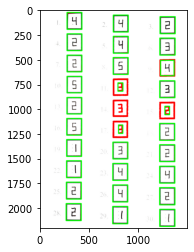

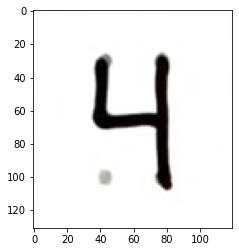

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


SSIM: 0.4937301982694947
[8.4954238e-11 2.5044871e-08 1.5339232e-08 7.8907061e-07 9.9999917e-01
 1.9004281e-08]


Predicted Value : 4
Answer_2.png


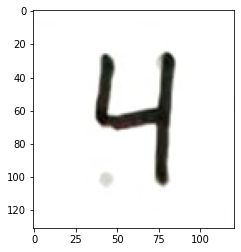

SSIM: 0.4426546011796532
[5.4810401e-10 5.7100163e-08 3.0257141e-08 1.1341258e-06 9.9999833e-01
 5.1381028e-07]


Predicted Value : 4
Answer_3.png


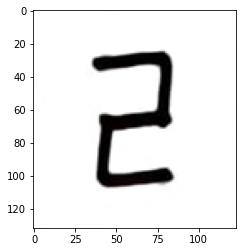

SSIM: 0.5261852607341201
[2.6284990e-06 1.8945292e-07 3.9561769e-01 6.0430127e-01 7.4565607e-05
 3.6687672e-06]
doubtful
Answer_4.png


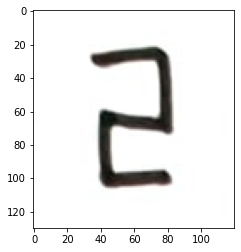

SSIM: 0.5021964205069134
[3.83609631e-06 9.46175582e-09 9.99929070e-01 6.42034720e-05
 1.04981346e-07 2.78129119e-06]


Predicted Value : 2
Answer_5.png


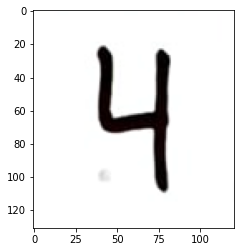

SSIM: 0.4587328490791645
[5.02900013e-11 1.80173154e-09 2.64989741e-09 3.71418878e-08
 1.00000000e+00 1.34875595e-08]


Predicted Value : 4
Answer_6.png


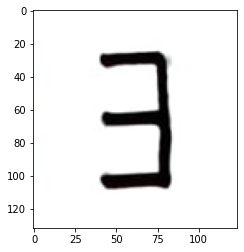

SSIM: 0.4695150465079605
[2.9737771e-07 3.0197980e-05 8.8533282e-04 9.9796152e-01 5.2495518e-05
 1.0702148e-03]


Predicted Value : 3
Answer_7.png


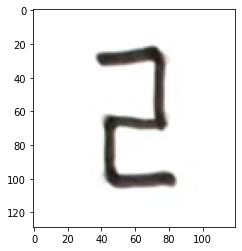

SSIM: 0.4062642276524394
[4.9392838e-06 1.1652475e-05 9.8804349e-01 1.1937793e-02 6.2602965e-08
 2.0948878e-06]


Predicted Value : 2
Answer_8.png


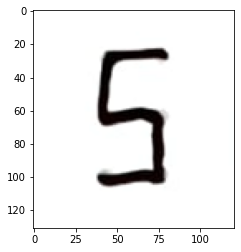

SSIM: 0.45736875943467403
[1.24961265e-11 2.69831296e-10 5.38832812e-10 7.83536009e-08
 6.61673050e-10 9.99999881e-01]


Predicted Value : 5
Answer_9.png


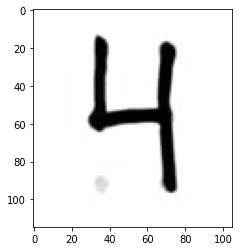

SSIM: 0.28064433143546397
[4.1017588e-13 1.9340116e-09 2.4362629e-10 2.1533710e-07 9.9999976e-01
 4.2320680e-09]


Predicted Value : 4
Answer_10.png


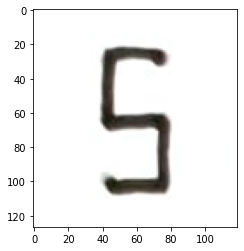

SSIM: 0.4067361650982085
[2.3788187e-11 1.6275152e-12 8.4992229e-11 2.5384047e-11 3.1373559e-09
 1.0000000e+00]


Predicted Value : 5
Answer_11.png


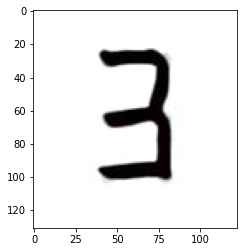

SSIM: 0.4475216699522168
[3.0960361e-09 1.3206032e-06 3.9065167e-06 9.9996209e-01 3.2631349e-05
 6.9813282e-08]


Predicted Value : 3
Answer_12.png


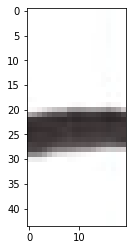

SSIM: 0.13745233506378152
[2.0377749e-08 2.6601003e-06 9.9954045e-01 8.1994959e-11 1.0312823e-05
 4.4659365e-04]


Predicted Value : 2
Answer_13.png


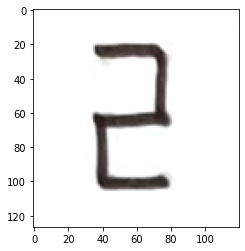

SSIM: 0.4105860467551991
[1.3233056e-06 2.9750207e-09 7.3049998e-01 2.6948816e-01 2.4641583e-06
 8.1691060e-06]


Predicted Value : 2
Answer_14.png


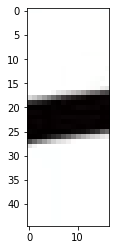

SSIM: 0.11604964774148434
[4.7265837e-04 6.0315683e-06 2.6093131e-01 4.4309985e-08 2.6865441e-02
 7.1172452e-01]


Predicted Value : 5
Answer_15.png


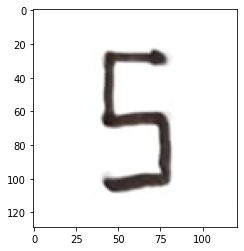

SSIM: 0.4210766326218433
[1.7661263e-10 8.6838814e-10 3.2137123e-07 4.0997306e-06 2.9641120e-08
 9.9999559e-01]


Predicted Value : 5
Answer_16.png


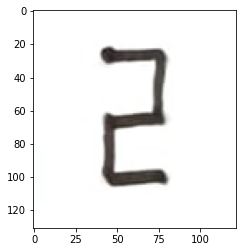

SSIM: 0.454271605413629
[7.5524326e-06 7.8713110e-06 8.9271657e-02 9.1066420e-01 1.8150131e-05
 3.0626317e-05]


Predicted Value : 3
Answer_17.png


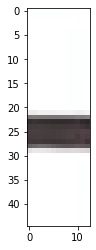

SSIM: 0.14523048595598056
[3.8081332e-08 8.9709298e-05 9.9910599e-01 9.6276731e-10 3.5381527e-05
 7.6882588e-04]


Predicted Value : 2
Answer_18.png


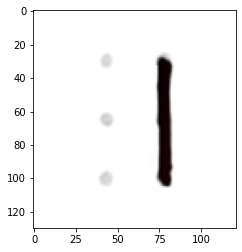

SSIM: 0.39695868680673874
[1.8006917e-06 9.9789089e-01 1.8377813e-07 1.1201251e-06 2.1058416e-03
 2.3951435e-07]


Predicted Value : 1
Answer_19.png


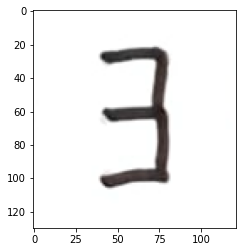

SSIM: 0.43969940634641025
[3.0381995e-09 1.0376268e-06 1.0651803e-06 9.9999487e-01 1.9215240e-06
 1.0820607e-06]


Predicted Value : 3
Answer_20.png


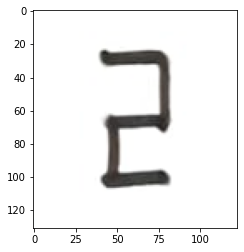

SSIM: 0.4711007199445258
[1.7514204e-04 1.0536694e-06 9.9102217e-01 8.7739043e-03 2.5366957e-05
 2.4286721e-06]


Predicted Value : 2
Answer_21.png


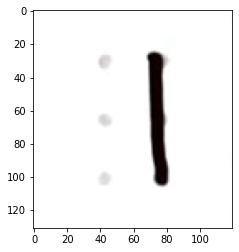

SSIM: 0.38774758809300286
[7.3495005e-07 9.9799675e-01 5.4481541e-07 7.3535251e-05 1.9284345e-03
 8.2990015e-09]


Predicted Value : 1
Answer_22.png


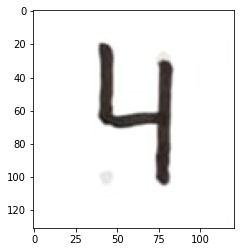

SSIM: 0.44278242239013504
[1.6946423e-11 1.6932072e-08 5.2012239e-10 2.6697602e-08 1.0000000e+00
 1.3154079e-08]


Predicted Value : 4
Answer_23.png


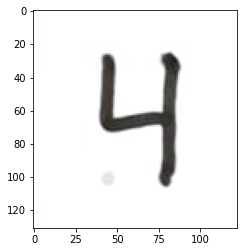

SSIM: 0.4297645273268679
[1.5019060e-10 2.5748488e-08 5.1503385e-08 1.2352882e-06 9.9999785e-01
 8.4699633e-07]


Predicted Value : 4
Answer_24.png


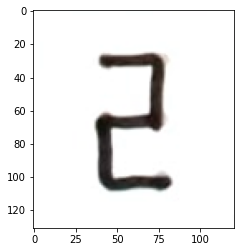

SSIM: 0.49408260727713016
[3.9889164e-05 4.7736235e-06 9.5073158e-01 4.6760757e-02 2.4606290e-03
 2.4166227e-06]


Predicted Value : 2
Answer_25.png


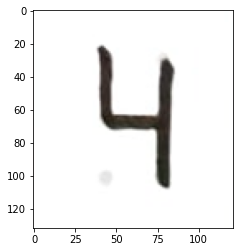

SSIM: 0.4152663017623001
[5.4874900e-11 4.6410471e-09 5.6810906e-10 2.3650168e-10 1.0000000e+00
 2.0447117e-09]


Predicted Value : 4
Answer_26.png


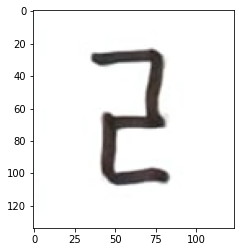

SSIM: 0.4611187268378525
[6.3521934e-06 2.5940242e-06 9.9877685e-01 1.2087775e-03 5.1778729e-06
 2.8099876e-07]


Predicted Value : 2
Answer_27.png


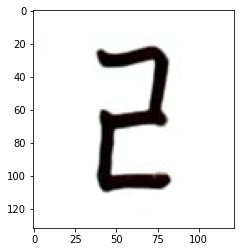

SSIM: 0.4886382923468259
[1.0048117e-07 4.5220151e-08 9.9175346e-01 8.2441885e-03 2.1322123e-06
 1.6326901e-07]


Predicted Value : 2
Answer_28.png


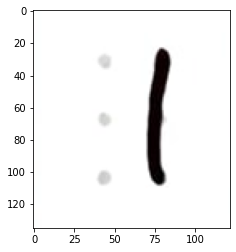

SSIM: 0.3880942508449631
[6.2128845e-07 9.9457514e-01 2.6679319e-07 9.1882457e-06 5.4146121e-03
 8.6547452e-08]


Predicted Value : 1
Answer_29.png


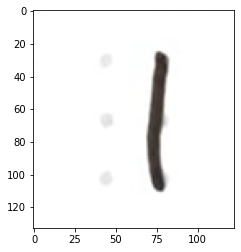

SSIM: 0.39153131456046064
[9.2548964e-07 9.9705887e-01 6.0831502e-07 8.3945106e-06 2.9311099e-03
 7.7999424e-08]


Predicted Value : 1
Answer_1.png


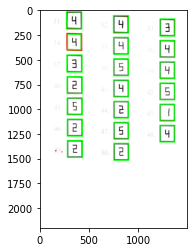

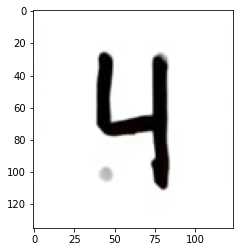

SSIM: 0.4824468996000217
[9.9527192e-11 9.8109887e-10 1.0923224e-08 1.2004283e-07 9.9999988e-01
 7.6451103e-09]


Predicted Value : 4
Answer_2.png


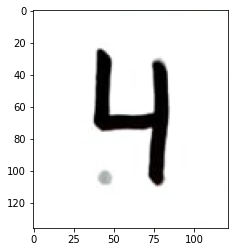

SSIM: 0.4429674369244565
[1.8481690e-10 5.3448208e-08 6.2626471e-10 1.8709091e-08 9.9999988e-01
 2.4282720e-08]


Predicted Value : 4
Answer_3.png


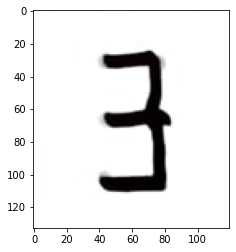

SSIM: 0.3862692353904378
[4.0762739e-08 2.0563305e-06 9.9190445e-05 9.9977666e-01 7.4942101e-05
 4.7120557e-05]


Predicted Value : 3
Answer_4.png


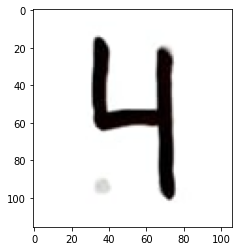

SSIM: 0.3124341900455786
[2.0162938e-12 2.6292555e-09 1.4733034e-10 5.2674604e-08 1.0000000e+00
 1.7075191e-08]


Predicted Value : 4
Answer_5.png


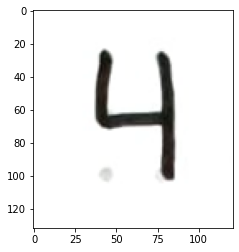

SSIM: 0.41536771653948984
[6.8183952e-12 8.8618570e-09 2.5215439e-08 1.6025111e-06 9.9999821e-01
 1.0970921e-07]


Predicted Value : 4
Answer_6.png


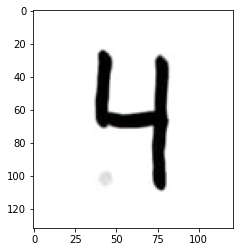

SSIM: 0.4878976858009814
[5.2092722e-11 4.2389299e-08 7.2221376e-09 8.5556579e-08 9.9999988e-01
 2.8737668e-08]


Predicted Value : 4
Answer_7.png


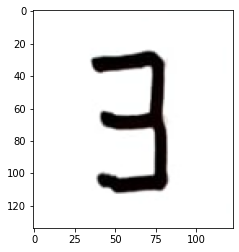

SSIM: 0.4610364436777647
[5.5541252e-09 5.0868556e-07 9.4752264e-05 9.9987340e-01 2.2477603e-05
 8.8615416e-06]


Predicted Value : 3
Answer_8.png


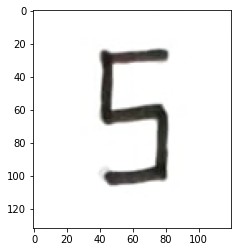

SSIM: 0.439033062229746
[6.0963332e-11 1.2077004e-08 4.0113470e-08 1.7637392e-05 1.3607701e-09
 9.9998236e-01]


Predicted Value : 5
Answer_9.png


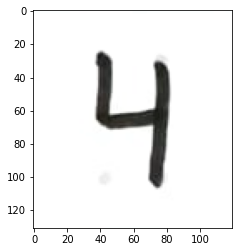

SSIM: 0.4531552072923869
[8.2839058e-10 7.3282870e-08 8.1527896e-09 8.6674584e-07 9.9999893e-01
 1.3179411e-07]


Predicted Value : 4
Answer_10.png


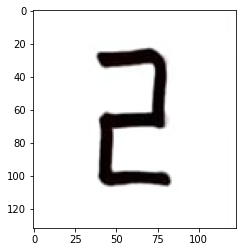

SSIM: 0.48303205965183277
[2.2712598e-07 5.2439884e-08 9.9891818e-01 1.0692157e-03 1.2184525e-05
 1.5580930e-07]


Predicted Value : 2
Answer_11.png


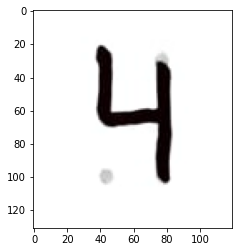

SSIM: 0.4302970377010301
[4.8973269e-12 4.1902863e-09 5.4073757e-10 7.2384529e-09 1.0000000e+00
 5.3499591e-09]


Predicted Value : 4
Answer_12.png


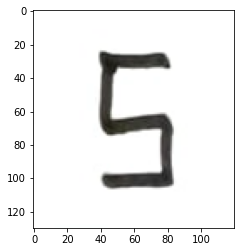

SSIM: 0.44017841167588645
[1.5182926e-09 2.5140826e-10 5.3758123e-07 1.0884921e-05 6.4071337e-08
 9.9998844e-01]


Predicted Value : 5
Answer_13.png


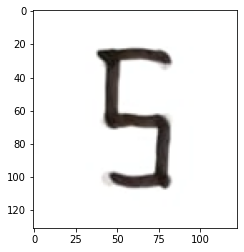

SSIM: 0.4270548314751437
[2.9161742e-11 3.2285527e-10 3.2053975e-09 1.4037681e-09 5.6767067e-09
 1.0000000e+00]


Predicted Value : 5
Answer_14.png


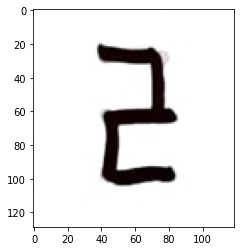

SSIM: 0.3850856962545404
[1.7482416e-05 3.1450153e-08 9.9806231e-01 1.9170992e-03 1.4691789e-06
 1.6566999e-06]


Predicted Value : 2
Answer_15.png


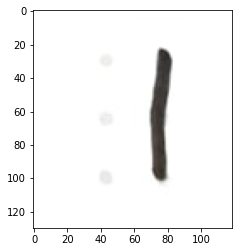

SSIM: 0.3746219858449758
[5.8562146e-06 9.9137503e-01 4.0755513e-06 4.0282737e-04 8.2088001e-03
 3.3819069e-06]


Predicted Value : 1
Answer_16.png


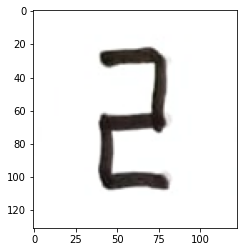

SSIM: 0.43482572817932014
[1.7941001e-07 3.9575212e-08 9.9939001e-01 6.0881692e-04 5.7623930e-07
 3.5773368e-07]


Predicted Value : 2
Answer_17.png


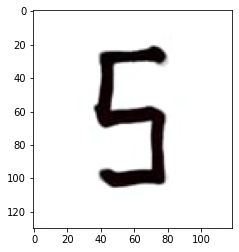

SSIM: 0.4970199217029381
[1.3997567e-10 2.8571612e-09 2.2074451e-07 5.2530616e-08 2.9576322e-10
 9.9999976e-01]


Predicted Value : 5
Answer_18.png


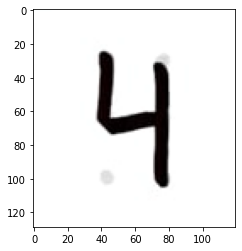

SSIM: 0.4293274623783856
[2.6080896e-10 1.2399832e-09 6.6526429e-09 5.3702087e-07 9.9999928e-01
 6.7460519e-08]


Predicted Value : 4
Answer_19.png


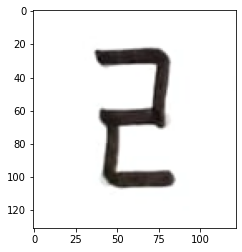

SSIM: 0.42749161534920216
[9.1460987e-07 1.3643192e-07 9.9640888e-01 3.5864150e-03 3.2045823e-06
 4.8786211e-07]


Predicted Value : 2
Answer_20.png


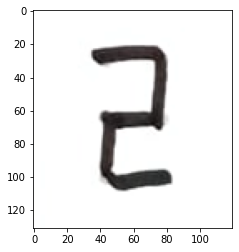

SSIM: 0.4677202150465104
[7.8771236e-06 4.7763302e-07 9.0867412e-01 9.1279604e-02 2.6603408e-05
 1.1279845e-05]


Predicted Value : 2
[4, 4, 'Doubtful', 2, 4, 3, 2, 5, 4, 5, 3, 2, 2, 5, 5, 3, 2, 1, 3, 2, 1, 4, 4, 2, 4, 2, 2, 1, 1, 4, 4, 3, 4, 4, 4, 3, 5, 4, 2, 4, 5, 5, 2, 1, 2, 5, 4, 2, 2]


In [ ]:
a = gen_predictions(data[0])
b = gen_predictions(data[1])
c= a+b
print(c)

In [ ]:
len(c)

49

In [ ]:
def result_generation(ans):

  for i in range(len(ans)):
    if ans[i] == "Unattempted":
      ans[i] = 0
    elif ans[i] == "Doubtful":
      ans[i] = int(input("Answer {} is doubtful. Please enter it here: ".format(i+1)))

  answers = pd.read_excel (r'/content/gdrive/My Drive/digit/Ineye-Answers.xlsx')
  dfA = answers[answers["Code"] == "A"]["Answer"].values.tolist()
  dfB = answers[answers["Code"] == "B"]["Answer"].values.tolist()
  score = 0
  for j in range(len(ans)):
    if ans[j] == dfA[j]:
      score+=1
  
  return score

In [ ]:
a = result_generation(c)
print("Your total score is {} out of 50".format(a))

Answer 3 is doubtful. Please enter it here: 2
Your total score is 14 out of 50


# Manual Checking

In [ ]:
import pandas as pd
ans = input("Input score: ")
my_ans = []
for i in range(len(ans)):
  my_ans.append(int(ans[i]))

print(my_ans)
len(my_ans)

Input score: 44323342432424231213213424224414341433324333125532
[4, 4, 3, 2, 3, 3, 4, 2, 4, 3, 2, 4, 2, 4, 2, 3, 1, 2, 1, 3, 2, 1, 3, 4, 2, 4, 2, 2, 4, 4, 1, 4, 3, 4, 1, 4, 3, 3, 3, 2, 4, 3, 3, 3, 1, 2, 5, 5, 3, 2]


50

In [ ]:
result = 0
for i in range(len(my_ans)):
  if my_ans[i] == dfA[i]:
    result+=1
print(result)
print(my_ans)
print(dfA)

30
[4, 4, 3, 2, 3, 3, 4, 2, 4, 3, 2, 4, 2, 4, 2, 3, 1, 2, 1, 3, 2, 1, 3, 4, 2, 4, 2, 2, 4, 4, 1, 4, 3, 4, 1, 4, 3, 3, 3, 2, 4, 3, 3, 3, 1, 2, 5, 5, 3, 2]
[2, 4, 3, 2, 4, 3, 4, 5, 4, 5, 2, 1, 2, 3, 2, 5, 2, 2, 1, 3, 2, 3, 4, 4, 2, 4, 2, 2, 3, 1, 1, 2, 3, 5, 4, 4, 3, 3, 2, 2, 4, 4, 3, 3, 1, 1, 5, 1, 2, 2]


In [ ]:
import pandas as pd
my_ans =[]
answers = pd.read_excel (r'/content/gdrive/My Drive/digit/Ineye-Answers.xlsx')
dfA = answers[answers["Code"] == "A"]["Answer"].values.tolist()
dfB = answers[answers["Code"] == "B"]["Answer"].values.tolist()

for i in range(50):
  my_ans.append(int(input("Enter ans no {} ".format(i+1))))

Enter ans no 1 2
Enter ans no 2 4
Enter ans no 3 3


KeyboardInterrupt: ignored

In [ ]:
result = 0
for i in range(len(my_ans)):
  if my_ans[i] == dfA[i]:
    result+=1
print(result)

31


In [ ]:
print(my_ans)
print(dfA)

[2, 4, 3, 2, 4, 3, 4, 4, 1, 5, 0, 3, 2, 5, 2, 5, 3, 2, 1, 2, 2, 2, 3, 4, 2, 4, 2, 2, 3, 1, 1, 2, 3, 4, 1, 4, 3, 2, 0, 1, 4, 3, 1, 4, 1, 1, 5, 4, 1, 2]
[2, 4, 3, 2, 4, 3, 4, 5, 4, 5, 2, 1, 2, 3, 2, 5, 2, 2, 1, 3, 2, 3, 4, 4, 2, 4, 2, 2, 3, 1, 1, 2, 3, 5, 4, 4, 3, 3, 2, 2, 4, 4, 3, 3, 1, 1, 5, 1, 2, 2]
